<a href="https://colab.research.google.com/github/HongSeongMo/Airbnb/blob/main/Another_copy_of_airbnb_lecture_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6강. 매출예측 모델 학습 : 앙상블

학습 데이터 읽기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd


In [3]:
path = 'drive/MyDrive/letuin/airbnb/data'

X_train = pd.read_csv(f'{path}/x_train.csv')
y_train = pd.read_csv(f'{path}/y_train.csv')

모델 학습

Random Forest Regressor
*   싸이킷런 공식 문서 :

In [4]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
model_rf = RandomForestRegressor(n_estimators=100, max_depth =5, max_leaf_nodes =30,
                                 random_state= 1)

In [5]:
# Impute missing values in X_train
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)

In [6]:
X_train = pd.DataFrame(X_train, columns=['accommodates', 'availability_365', 'calculated_host_listings_count',
       'minimum_maximum_nights', 'latitude', 'number_of_reviews',
       'maximum_minimum_nights', 'review_scores_value',
       'review_scores_accuracy', 'review_scores_location',
       'review_scores_checkin', 'host_listings_count', 'reviews_per_month',
       'review_scores_rating', 'maximum_nights_avg_ntm', 'maximum_nights',
       'minimum_nights', 'number_of_reviews_ltm', 'review_scores_cleanliness',
       'availability_30', 'host_total_listings_count',
       'review_scores_communication',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'minimum_nights_avg_ntm', 'availability_90', 'minimum_minimum_nights',
       'maximum_maximum_nights', 'longitude',
       'calculated_host_listings_count_shared_rooms', 'number_of_reviews_l30d',
       'availability_60', 'beds', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'has_availability', 'instant_bookable',
       'host_since', 'last_review', 'first_review', 'price',
       'host_response_rate', 'host_acceptance_rate', 'room_entire',
       'room_hotel', 'room_private', 'room_shared', 'response_3d',
       'response_1d', 'response_3h', 'response_1h'])

In [7]:
# 모델 학습
model_rf.fit(X_train, y_train['revenue'])

RandomForestRegressor(max_depth=5, max_leaf_nodes=30, random_state=1)

XGBoost regressor
*   XGBoost 공식 문서 :

In [8]:
import xgboost as xgb

# 모델 생성
model_xgb = xgb.XGBRegressor(n_estimators=100, max_depth = 5, max_leaf_nodes=30,
                             objective = 'reg:squarederror',
                             random_state=1)

In [9]:
# 모델 학습
model_xgb.fit(X_train, y_train['revenue'])

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:26:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_leaf_nodes" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaf_nodes=30,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

모델 성능 평가

매출 예측

In [10]:
X_train['price']

0         115.0
1         125.0
2          43.0
3          65.0
4         115.0
          ...  
30282      42.0
30283     857.0
30284     115.0
30285      55.0
30286    1200.0
Name: price, Length: 30287, dtype: float64

In [11]:
y_pred_rf = model_rf.predict(X_train)

y_pred_rf

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
y_pred_rf = pd.DataFrame(y_pred_rf, columns=['pred_rf'])

y_pred_rf

,pred_rf
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
30282,0.0
30283,0.0
30284,0.0
30285,0.0


In [13]:
y_pred_xgb = model_xgb.predict(X_train)

y_pred_xgb

array([6.1331787e-07, 6.1331787e-07, 6.1331787e-07, ..., 6.1331787e-07,
       6.1331787e-07, 6.1331787e-07], dtype=float32)

In [14]:
y_pred_xgb = pd.DataFrame(y_pred_xgb, columns=['pred_xgb'])

y_pred_xgb

,pred_xgb
0,6.133179e-07
1,6.133179e-07
2,6.133179e-07
3,6.133179e-07
4,6.133179e-07
...,...
30282,6.133179e-07
30283,6.133179e-07
30284,6.133179e-07
30285,6.133179e-07


In [15]:
y_train = pd.concat([y_train, y_pred_rf, y_pred_xgb], axis=1)

y_train

,revenue,pred_rf,pred_xgb
0,0.0,0.0,6.133179e-07
1,0.0,0.0,6.133179e-07
2,0.0,0.0,6.133179e-07
3,0.0,0.0,6.133179e-07
4,0.0,0.0,6.133179e-07
...,...,...,...
30282,0.0,0.0,6.133179e-07
30283,0.0,0.0,6.133179e-07
30284,0.0,0.0,6.133179e-07
30285,0.0,0.0,6.133179e-07


Target Value 비교 : 실제 vs 예측

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15,10)

<Axes: xlabel='revenue', ylabel='pred_rf'>

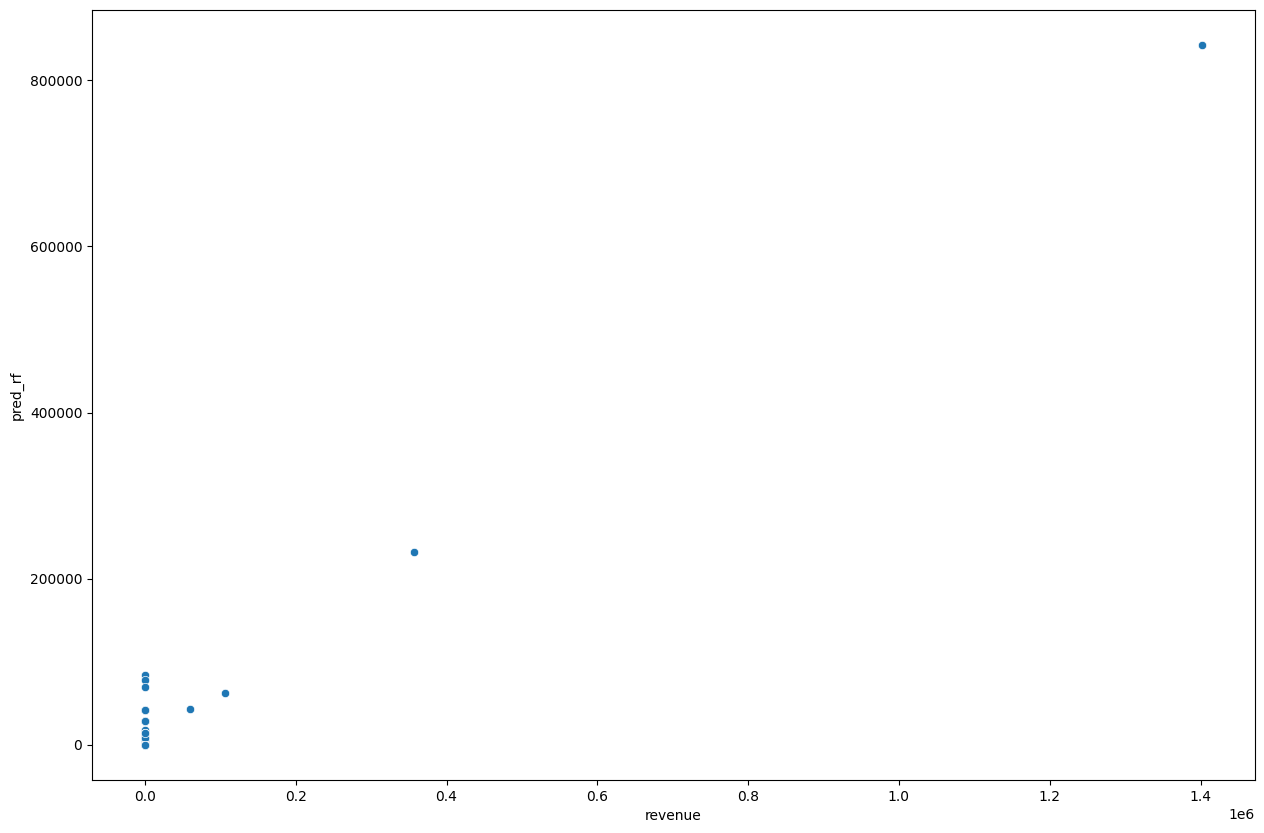

In [17]:
sns.scatterplot(data = y_train,
                x = 'revenue',
                y = 'pred_rf')

<Axes: xlabel='revenue', ylabel='pred_xgb'>

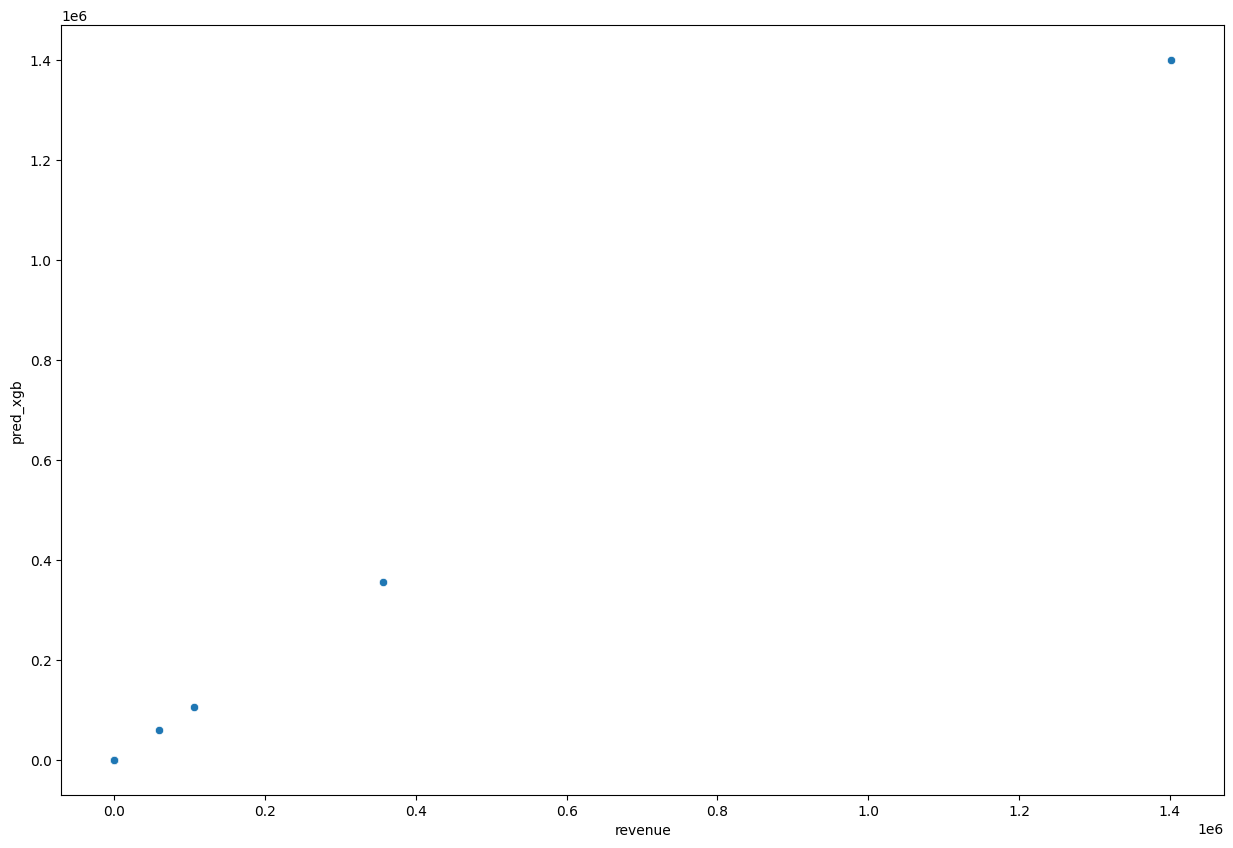

In [18]:
sns.scatterplot(data = y_train,
                x = 'revenue',
                y = 'pred_xgb')

MAE(Mean Absolute Error)

*   정의 : 오차 절대값의 평균
*   단위 : 예측값의 단위와 동일(의미 해석이 직관적임)
*   의미 : 예측값이 실제값과 벗어나는 정도의 평균
*   값이 작을수록 예측이 정확. 즉, 모델의 성능이 좋음
*   예) MAE가 10,000원이면, 모델의 예측결과가 실제값으로부터 평균적으로 만원정도 벗어난다고 해석

In [19]:
from sklearn.metrics import mean_absolute_error

In [20]:
mean_absolute_error(y_train.revenue, y_train.pred_rf)

48.20531845346188

In [21]:
mean_absolute_error(y_train.revenue, y_train.pred_xgb)

1.7766901680301373e-05

MAPE(Median Absolute Percentage Error)
*   정의 : 퍼센티지 에러 절대값의 중위값
*   단위 : 퍼센트(%)
    *   서로 다른 예측모델의 성능을 비교할 수 있어, 범용적인 장점이 있음
*   의미 : 예측 오차율의 중간값
*   값이 작을수록 예측이 정확함. 즉, 모델 성능이 좋음
*   예)MAPE가 10%이면, 모델이 예측한 결과들 중 절반은 오차율이 10% 안쪽임

In [22]:
import numpy as np
# define mape
def mape(actual, pred):
    mape = (np.abs(pred - actual)/actual).median()*100
    return mape

In [23]:
mape(y_train.revenue, y_train.pred_rf)

inf

In [24]:
mape(y_train.revenue, y_train.pred_xgb)

inf

Error 히스토그램
*   목적 : 예측값의 에러 분포를 확인

In [25]:
y_train['error_rf'] = np.abs(y_train['pred_rf'] - y_train['revenue'])
y_train['error_xgb'] = np.abs(y_train['pred_xgb'] - y_train['revenue'])

In [26]:
y_train.error_rf.describe()

count     30287.000000
mean         48.205318
std        3446.265270
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      558664.020000
Name: error_rf, dtype: float64

In [27]:
y_train.error_xgb.describe()

count    3.028700e+04
mean     1.776690e-05
std      2.228043e-03
min      2.647111e-14
25%      6.133179e-07
50%      6.133179e-07
75%      6.133179e-07
max      3.750000e-01
Name: error_xgb, dtype: float64

In [28]:
# 로그 변환
y_train['error_rf'] = np.log10(y_train['error_rf'])
y_train['error_xgb'] = np.log10(y_train['error_xgb'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


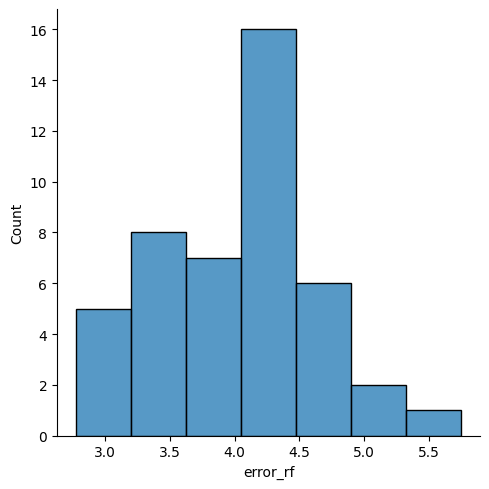

In [29]:
sns.displot(data = y_train, x='error_rf')

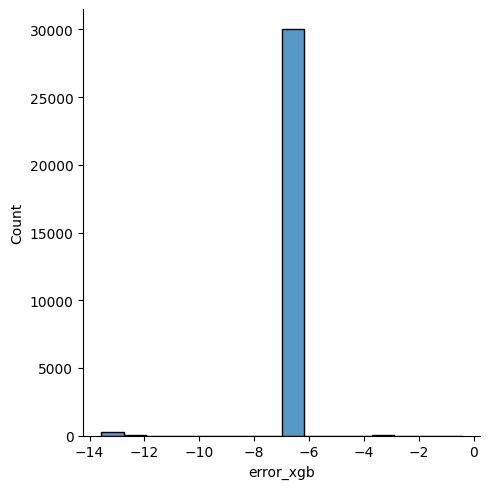

In [30]:
sns.displot(data = y_train, x='error_xgb')

트리 시각화

Random Forest Regressor

In [31]:
from sklearn.tree import plot_tree

In [32]:
# single tree
estimator = model_rf.estimators_[50]

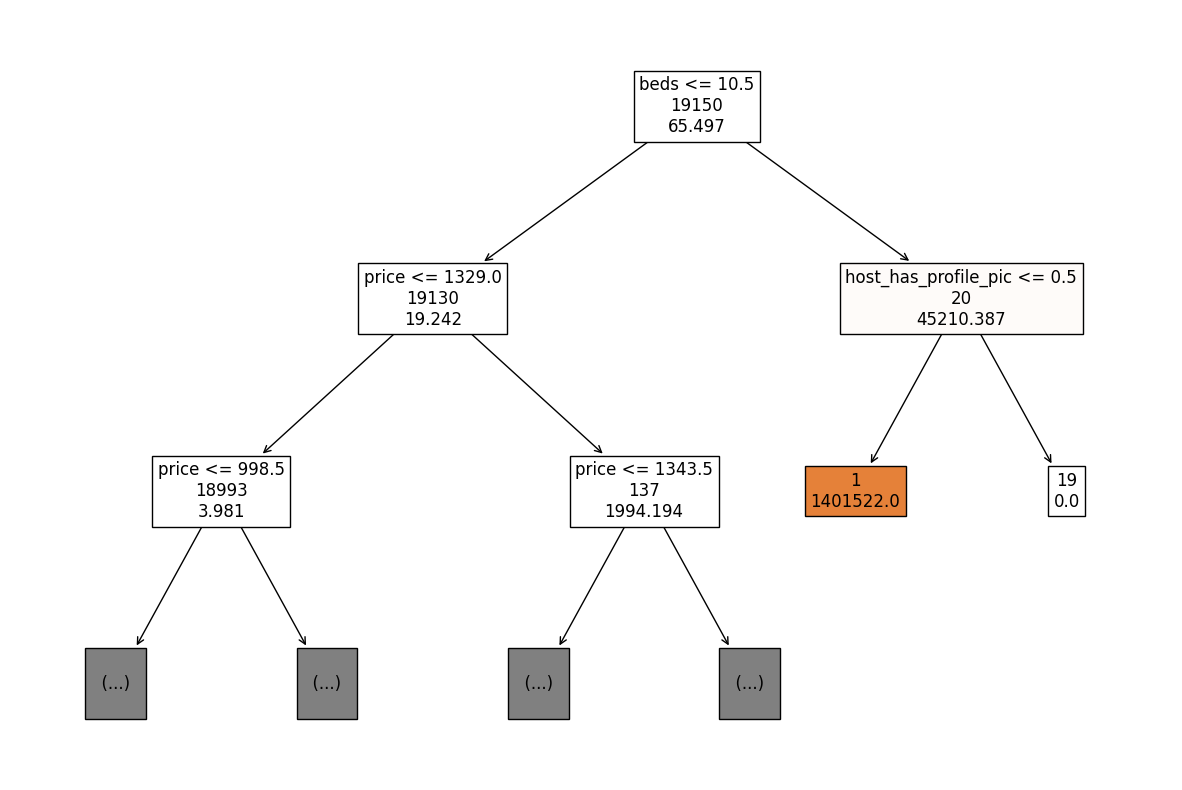

In [33]:
plot_tree(estimator,
          feature_names= X_train.columns,
          filled= True,
          label = 'none', impurity = None,
          max_depth= 2,
          fontsize = 12)

plt.show()

XGBoost Regressor

<Axes: >

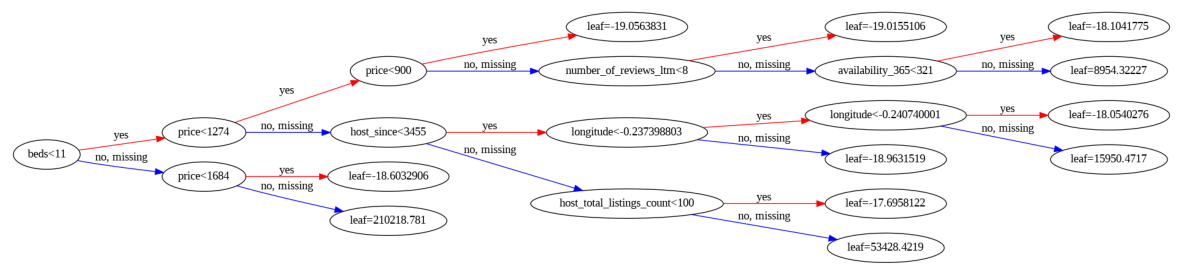

In [35]:
xgb.plot_tree(model_xgb, num_trees=0, rankdir = 'LR')

Feature Importance

Random Forest

In [37]:
fi_df = pd.DataFrame([model_rf.feature_importances_], columns = X_train.columns).T.reset_index()
fi_df = fi_df.sort_values(0, ascending=False)

fi_df

,index,0
41,price,0.477803
15,maximum_nights,0.083813
14,maximum_nights_avg_ntm,0.082584
0,accommodates,0.074657
27,maximum_maximum_nights,0.054733
3,minimum_maximum_nights,0.047356
32,beds,0.036899
34,host_has_profile_pic,0.028084
22,calculated_host_listings_count_entire_homes,0.020012
2,calculated_host_listings_count,0.016912


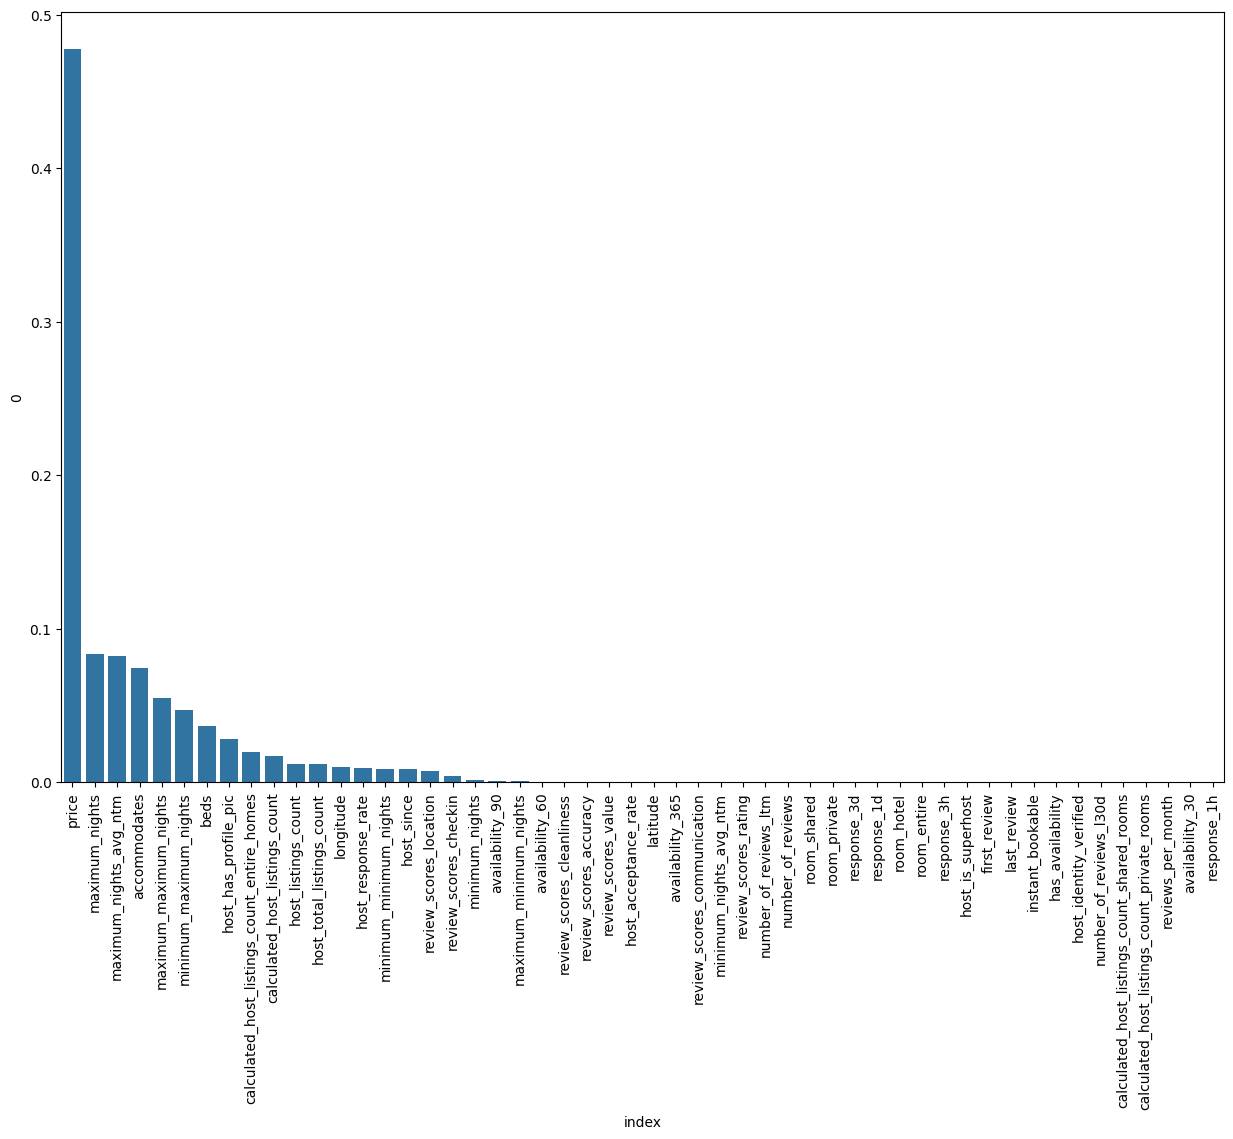

In [38]:
sns.barplot(data = fi_df,
            x = 'index',
            y = 0)

plt.xticks(rotation = 90)
plt.show()

XGBoost

In [39]:
fi_df = pd.DataFrame([model_xgb.feature_importances_], columns = X_train.columns).T.reset_index()
fi_df = fi_df.sort_values(0, ascending=False)

fi_df

,index,0
41,price,7.388151e-01
20,host_total_listings_count,1.278703e-01
32,beds,1.048698e-01
38,host_since,1.750290e-02
28,longitude,6.490295e-03
1,availability_365,4.044867e-03
17,number_of_reviews_ltm,4.067167e-04
11,host_listings_count,1.309727e-14
0,accommodates,0.000000e+00
37,instant_bookable,0.000000e+00


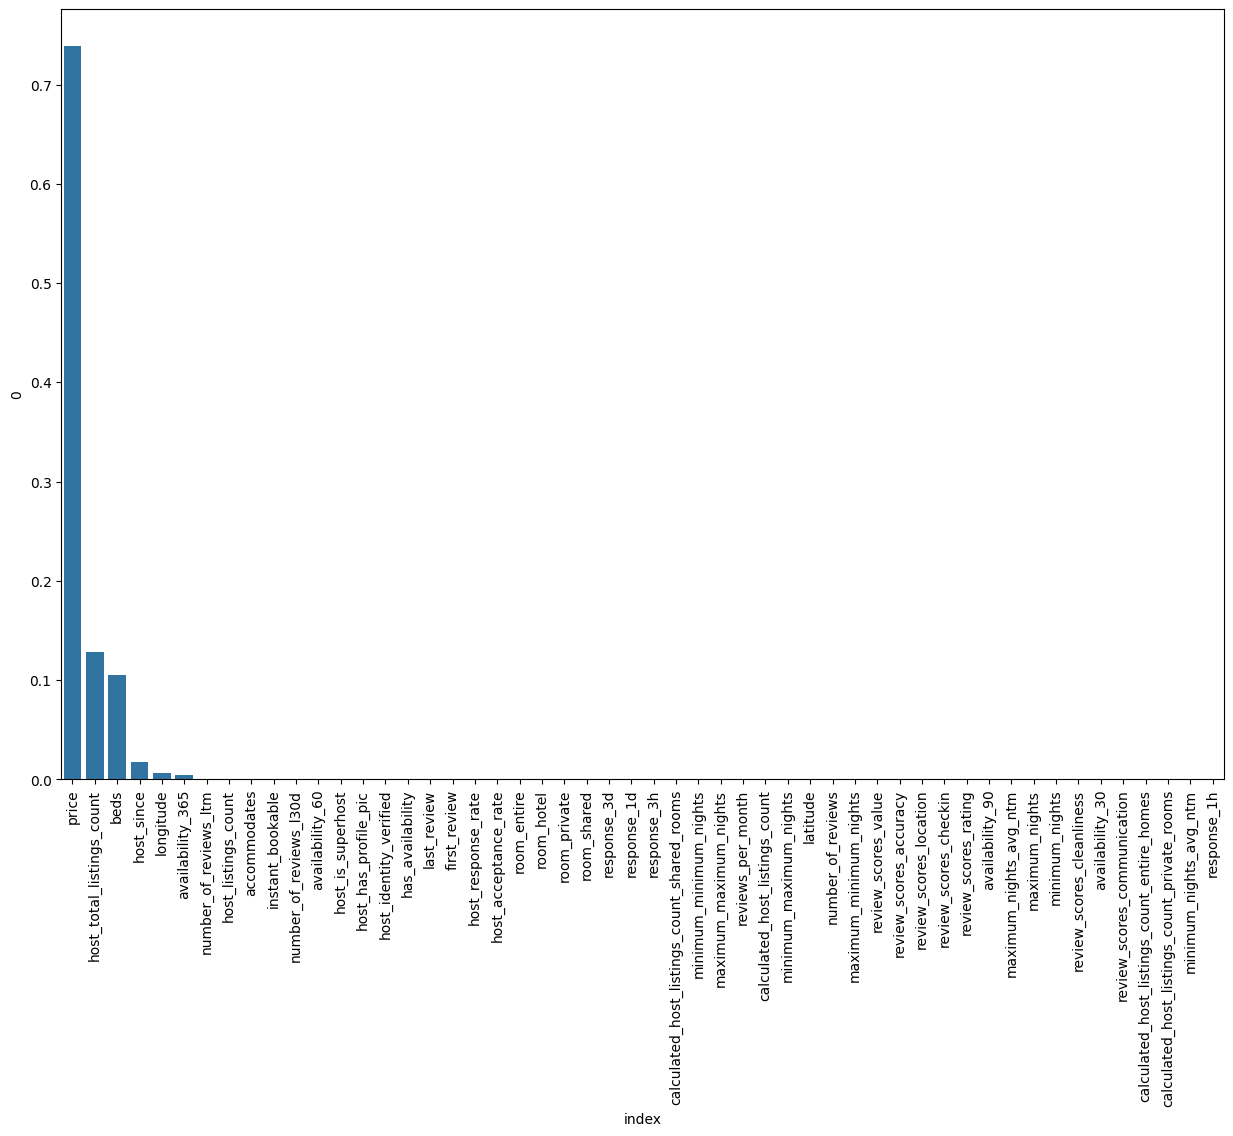

In [40]:
sns.barplot(data = fi_df,
            x = 'index',
            y = 0)

plt.xticks(rotation=90)
plt.show()

모델 저장

In [41]:
import joblib

In [42]:
path_model = 'drive/MyDrive/letuin/airbnb/model'

In [43]:
# linear model
joblib.dump(model_rf, f'{path_model}/model_rf.pkl')

['drive/MyDrive/letuin/airbnb/model/model_rf.pkl']

In [44]:
# tree model
joblib.dump(model_xgb, f'{path_model}/model_xgb.pkl')

['drive/MyDrive/letuin/airbnb/model/model_xgb.pkl']